# Assignment 5
**Due date/time:** Apr 9th Tue 23:59pm

**Instruction**: Make a copy of this notebook and read through the questions and instructions. Write down code/text to perform the analysis.

**Submission**: After you finish working on this notebook, click File->Download->Download .ipynb

Please submit a notebook named A5_your_name.ipynb on Canvas.

## Detailed instructions:

In this assignment, you will practice building Multi-level Models (MLM).

We will be re-using our data and model specifications from Assignment 3 and 4. For the same set of dependent variable (y) and independent variables (X) you will build 3 models.


**Model 1 (30%):** Fit an MLM with varying intercept only (no Xs) as follows

`model1 = Lmer('y ~ 1 + (1|state)', data=your_data)`

Describe your model output and calculate the Variance Partition Coefficient (VPC), explain your results.

**Model 2 (30%):** Fit an MLM with varying intercept and your independent variables as fixed effects as follows

`model2 = Lmer('y ~ 1 + x1 + x2 + ...xj + (1|state)', data=your_data)`

Map your state-level random effect for the intercept, and explain your MLM model output.

**Model 3 (30%):** Fit an MLM with varying intercept and both fixed and random effect for your independent variables (a varying intercept + slope model) as follows:

`model3 = Lmer('y ~ 1 + x1 + x2 + ...xj + (1 + x1 + x2 + ...xj|state)', data=your_data)`

Map all of your state-level random effects, and explain your MLM model output.

**Final comparison (10%):** compare AIC, conditional and marginal R2 in three models.

Note: replace x1, x2... in the model with the column name of your independent variable.


In [1]:
from pymer4.models import Lmer

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

Code to read in data and merge them into one final `GeoDataFrame`.

In [3]:
health_url = "https://raw.github.com/Ziqi-Li/GIS5122/main/data/cdc_health_county.csv"
health = pd.read_csv(health_url)

In [4]:
socio_demo_url = "https://raw.github.com/Ziqi-Li/GIS5122/main/data/acs_2019.csv"
socio_demo = pd.read_csv(socio_demo_url)

In [5]:
counties_url = "https://raw.github.com/Ziqi-Li/gis5122/master/data/us_counties.geojson"
counties = gpd.read_file(counties_url)

In [6]:
socio_demo_health = pd.merge(socio_demo, health, left_on = "county_id", right_on = "LocationID")

In [7]:
gdf_socio_demo_health = pd.merge(counties, socio_demo_health, on = "county_id")

In [8]:
gdf_socio_demo_health.columns

Index(['GEOID', 'STATEFP', 'NAME_x', 'county_id', 'geometry', 'state',
       'county', 'NAME_y', 'proj_X', 'proj_Y', 'total_pop', 'sex_ratio',
       'pct_black', 'pct_hisp', 'pct_bach', 'median_income', 'pct_65_over',
       'pct_age_18_29', 'gini', 'pct_manuf', 'ln_pop_den', 'pct_fb',
       'pct_uninsured', 'LocationID', 'ACCESS2', 'ARTHRITIS', 'BINGE',
       'CANCER', 'CASTHMA', 'CERVICAL', 'CHD', 'CHECKUP', 'COLON_SCREEN',
       'COPD', 'COREM', 'COREW', 'CSMOKING', 'DENTAL', 'DIABETES', 'KIDNEY',
       'LPA', 'MAMMOUSE', 'MHLTH', 'OBESITY', 'PHLTH', 'SLEEP', 'STROKE',
       'TEETHLOST'],
      dtype='object')

Your code will start here, and your analysis will be based on this GeoDataFrame `gdf_socio_demo_health`.

In [9]:
state = gdf_socio_demo_health.dissolve(by='state')

### Model 1

In [10]:
model1 = Lmer('OBESITY ~ 1 + (1|state)', data=gdf_socio_demo_health)
model1.fit()

/Users/ziqili/anaconda3/lib/python3.11/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "geometry". Fall back to string conversion. The error is: 'GeometryDtype' object has no attribute 'isnative'
  warnings.warn('Error while trying to convert '


Linear mixed model fit by REML [’lmerMod’]
Formula: OBESITY~1+(1|state)

Family: gaussian	 Inference: parametric

Number of observations: 3103	 Groups: {'state': 48.0}

Log-likelihood: -8194.815 	 AIC: 16395.629

Random effects:

                 Name     Var    Std
state     (Intercept)  12.854  3.585
Residual               10.828  3.291

No random effect correlations specified

Fixed effects:



/Users/ziqili/anaconda3/lib/python3.11/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),33.878,32.846,34.911,0.527,45.421,64.322,0.0,***


### Question:
Describe your model output and calculate the Variance Partition Coefficient (VPC), explain your results.

### Model 2

In [11]:
model2 = Lmer('OBESITY ~ 1 + pct_bach + pct_age_18_29 + (1|state)', data=gdf_socio_demo_health)
model2.fit()

/Users/ziqili/anaconda3/lib/python3.11/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "geometry". Fall back to string conversion. The error is: 'GeometryDtype' object has no attribute 'isnative'
  warnings.warn('Error while trying to convert '


Linear mixed model fit by REML [’lmerMod’]
Formula: OBESITY~1+pct_bach+pct_age_18_29+(1|state)

Family: gaussian	 Inference: parametric

Number of observations: 3103	 Groups: {'state': 48.0}

Log-likelihood: -7207.351 	 AIC: 14424.701

Random effects:

                 Name    Var    Std
state     (Intercept)  5.853  2.419
Residual               5.716  2.391

No random effect correlations specified

Fixed effects:



/Users/ziqili/anaconda3/lib/python3.11/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),37.677,36.900,38.453,0.396,70.926,95.099,0.0,***
pct_bach,-0.281,-0.292,-0.271,0.005,3090.401,-52.823,0.0,***
pct_age_18_29,0.206,0.184,0.228,0.011,3061.743,18.258,0.0,***


### Q: Map your state-level random effect for the intercept, and explain your MLM model output.

/var/folders/mp/9px298sd6vs8xccb_3sql0dr0000gp/T/ipykernel_1917/3870236806.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  state.plot(model2.ranef.iloc[:,0].values + model2.coefs.Estimate[0],legend=True)


Text(0.5, 1.0, 'Varying intercept')

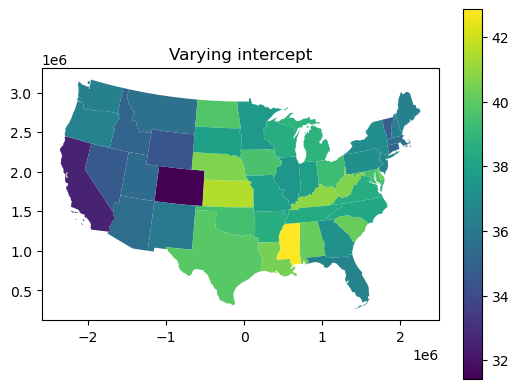

In [12]:
state.plot(model2.ranef.iloc[:,0].values + model2.coefs.Estimate[0],legend=True)
plt.title("Varying intercept")

### Model 3

In [13]:
model3 = Lmer('OBESITY ~ 1 + pct_bach + pct_age_18_29 + (1 + pct_bach + pct_age_18_29 | state)', 
              data=gdf_socio_demo_health)

In [14]:
model3.fit()
model3.summary()

/Users/ziqili/anaconda3/lib/python3.11/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "geometry". Fall back to string conversion. The error is: 'GeometryDtype' object has no attribute 'isnative'
  warnings.warn('Error while trying to convert '


boundary (singular) fit: see help('isSingular') 

Linear mixed model fit by REML [’lmerMod’]
Formula: OBESITY~1+pct_bach+pct_age_18_29+(1+pct_bach+pct_age_18_29|state)

Family: gaussian	 Inference: parametric

Number of observations: 3103	 Groups: {'state': 48.0}

Log-likelihood: -7193.480 	 AIC: 14406.960

Random effects:

                   Name    Var    Std
state       (Intercept)  4.840  2.200
state          pct_bach  0.002  0.042
state     pct_age_18_29  0.008  0.087
Residual                 5.587  2.364

               IV1            IV2   Corr
state  (Intercept)       pct_bach  0.071
state  (Intercept)  pct_age_18_29  0.100
state     pct_bach  pct_age_18_29 -0.985

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: OBESITY~1+pct_bach+pct_age_18_29+(1+pct_bach+pct_age_18_29|state)

Family: gaussian	 Inference: parametric

Number of observations: 3103	 Groups: {'state': 48.0}

Log-likelihood: -7193.480 	 AIC: 14406.960

Random effects:

                   Name   

/Users/ziqili/anaconda3/lib/python3.11/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/Users/ziqili/anaconda3/lib/python3.11/site-packages/pymer4/models/Lmer.py:744: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_corrs = ran_corrs.applymap(


,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),37.676,36.953,38.399,0.369,44.728,102.161,0.0,***
pct_bach,-0.287,-0.304,-0.270,0.009,34.997,-32.975,0.0,***
pct_age_18_29,0.214,0.178,0.250,0.018,35.747,11.728,0.0,***


### Q: Map all of your state-level random effects, and explain your MLM model output.

/var/folders/mp/9px298sd6vs8xccb_3sql0dr0000gp/T/ipykernel_1917/222504948.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  state.plot(model3.ranef.iloc[:,0].values + model3.coefs.Estimate[0],legend=True)


Text(0.5, 1.0, 'Varying intercept')

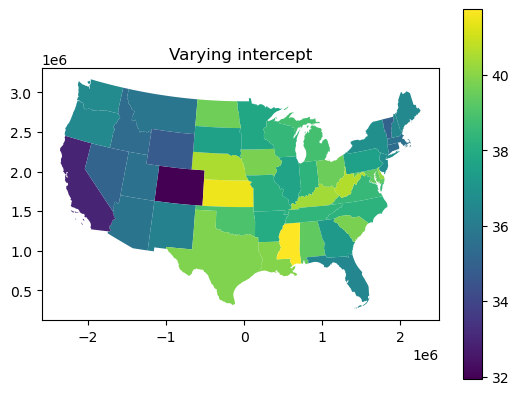

In [15]:
state.plot(model3.ranef.iloc[:,0].values + model3.coefs.Estimate[0],legend=True)
plt.title("Varying intercept")

Text(0.5, 1.0, 'Varying slope of pct_bach')

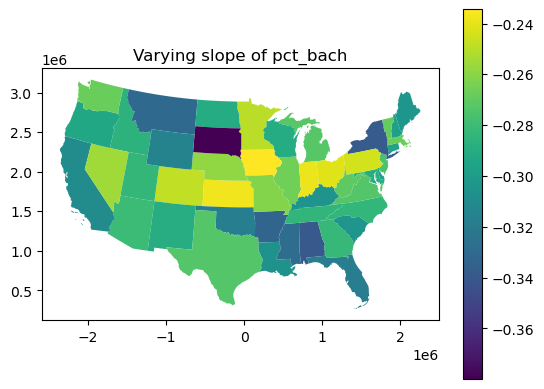

In [16]:
state.plot(model3.ranef.iloc[:,1].values + model3.coefs.Estimate.iloc[1],legend=True)
plt.title("Varying slope of pct_bach")

Text(0.5, 1.0, 'Varying slope of pct_18_29')

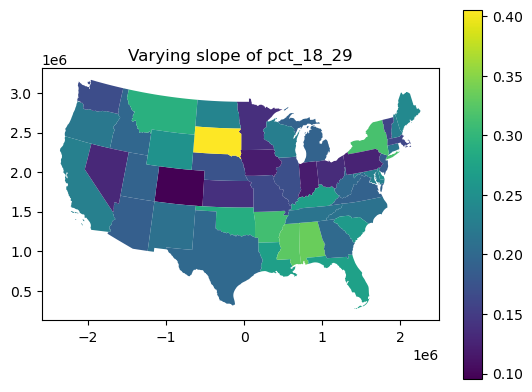

In [17]:
state.plot(model3.ranef.iloc[:,2].values + model3.coefs.Estimate.iloc[2],legend=True)
plt.title("Varying slope of pct_18_29")

In [18]:
def r_square(model):
    var_a = np.sum(model.ranef_var.Var.iloc[:-1]) #Sum of variances from random effects
    var_e = model.ranef_var.Var.iloc[-1] #Error variance 
    var_f = np.sum(model.design_matrix*model.coefs.Estimate,axis=1).var() #Sum of variances from fixed effects
    
    marginal = var_f/(var_f+var_a+var_e)
    
    conditional = (var_f+var_a)/(var_f+var_a+var_e)
    
    print("marginal R2:",marginal)
    print("conditional R2:",conditional)
    return

In [19]:
r_square(model1)

marginal R2: 6.308990540107676e-26
conditional R2: 0.5427596137724334


In [20]:
r_square(model2)

marginal R2: 0.3633360989252162
conditional R2: 0.6854549196287146


In [21]:
r_square(model3)

marginal R2: 0.39693551843408925
conditional R2: 0.6771364638196643


### Q: Final comparison (10%): compare AIC, conditional and marginal R2 in three models. 